In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Read in Data
df = pd.read_csv('cleaned_full_2.csv')


In [3]:
historic_df = df[~df['status'].isin(['late (31-120 days)','current','in grace period','late (16-30 days)'])]
open_df = df[~df['status'].isin(['fully paid','default','charged off'])]

# Define predictors and response for feature selection
logistic = LogisticRegression()

# define response variable
y = historic_df['status_binary'].values

# Create dummy variables and combine with quantitative into predictors matrix
categories = historic_df[['is_inc_v','home_ownership','purpose','addr_state','sub_grade']]
categories = pd.get_dummies(categories, dummy_na = True)
quant = historic_df[['funded_amnt', 'term', 'int_rate','emp_length_num','dti', 'open_acc','total_acc']]
X = pd.concat([quant,categories], axis = 1)

# Fit a logistic model (without using cross validation)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=62)
model = logistic.fit(x_train,y_train)
preds = logistic.predict(x_test)


#calculate model performance results
results = confusion_matrix(y_test,preds)
tn = results[1,1]
tp = results[0,0]
fp = results[0,1]
fn = results[1,0]

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)

X2 = open_df.drop(['status','member_id','issue_d','last_pymnt_d','next_pymnt_d',
                   'last_credit_pull_d','final_d','earliest_cr_line','is_inc_v','home_ownership',
                   'addr_state','purpose','sub_grade'],axis = 1)
categories2 = open_df[['is_inc_v','home_ownership','purpose','addr_state','sub_grade']]
quant2 = open_df[['funded_amnt', 'term', 'int_rate','emp_length_num','dti', 'open_acc','total_acc']]
categories2 = pd.get_dummies(categories2, dummy_na = True)
X2 = pd.concat([quant2,categories2], axis = 1)
defaults = logistic.predict(X2)
open_df['predict'] = logistic.predict(X2)

df = pd.concat([open_df, historic_df])
an_fill = {
        'predict': -1,
    }
df.fillna(nan_fill, inplace=True)

NameError: name 'historic_df' is not defined

In [15]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    Input: cm (confusion matrix), title (str), cmap ()
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[24742    66]
 [ 5797    38]]


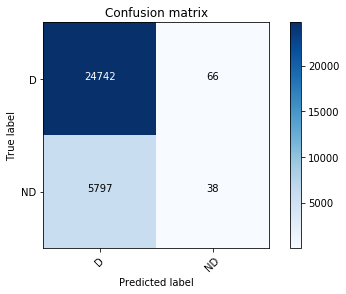

In [16]:
#plot the matrix
plot_confusion_matrix(confusion_matrix(y_test, preds), ['D', 'ND'])

In [2]:
from sklearn.metrics import confusion_matrix
#calculate model performance results
results = confusion_matrix(y_test,preds)
tn = results[1,1]
tp = results[0,0]
fp = results[0,1]
fn = results[1,0]
print("TN", tn)
print("TP", tp)
print("FP",fp)
print("FN",fn)
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print("Accuracy",accuracy)
print("Precision",precision)
print("Recall",recall)

#30643


NameError: name 'y_test' is not defined

In [18]:
# Set up dataset of current loans to predict values for
df2 = df2[~df2['status'].isin(['fully paid','default','charged off'])]
X2 = open_df.drop(['status','member_id','issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d','final_d','earliest_cr_line','is_inc_v','home_ownership','addr_state','purpose','sub_grade'],axis = 1)
categories2 = open_df[['is_inc_v','home_ownership','purpose','addr_state','sub_grade']]
quant2 = open_df[['funded_amnt', 'term', 'int_rate','emp_length_num','dti', 'open_acc','total_acc']]
categories2 = pd.get_dummies(categories2, dummy_na = True)
X2 = pd.concat([quant2,categories2], axis = 1)

In [19]:
# Response variable for current loans
defaults = logistic.predict(X2)
np.sum(defaults)

1316

In [ ]:
#Odds for each feature
np.exp(coefficients)